<h1>Logistic Regression on Titanic Survival Data</h1>

<h2>Setting up libraries and files</h2>

In [142]:
#Import libraries and set configurations

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [144]:
#Load the train and test data

In [145]:
trainData = pd.read_csv('../data/train.csv')
testData = pd.read_csv('../data/test.csv')

In [146]:
#View the data using head functions

In [147]:
print('Train Data')
trainData.head()
print('Test Data')
testData.head()

Train Data


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


Test Data


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.0,1,0,14.4542
1,622,1,1,male,42.0,1,0,52.5542
2,623,1,3,male,20.0,1,1,15.7417
3,624,0,3,male,21.0,0,0,7.8542
4,625,0,3,male,21.0,0,0,16.1000


In [148]:
trainData.info()
print()
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  620 non-null    int64  
 1   Survived     620 non-null    int64  
 2   Pclass       620 non-null    int64  
 3   Sex          620 non-null    object 
 4   Age          489 non-null    float64
 5   SibSp        620 non-null    int64  
 6   Parch        620 non-null    int64  
 7   Fare         620 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 38.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  271 non-null    int64  
 1   Survived     271 non-null    int64  
 2   Pclass       271 non-null    int64  
 3   Sex          271 non-null    object 
 4   Age          225 non-null    float64
 5   SibSp    

In [149]:
trainData.index
testData.index

RangeIndex(start=0, stop=620, step=1)

RangeIndex(start=0, stop=271, step=1)

In [150]:
trainData.columns
testData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [151]:
trainData.describe()
testData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,620.000000,620.000000,620.000000,489.000000,620.000000,620.000000,620.000000
mean,310.500000,0.393548,2.309677,29.781186,0.538710,0.382258,31.746982
std,179.122863,0.488931,0.833993,14.404998,1.086018,0.792131,45.907139
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,155.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,310.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.750000
75%,465.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.548950
max,620.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,271.000000,271.000000,271.000000,225.000000,271.000000,271.000000,271.000000
mean,756.000000,0.361624,2.306273,29.520756,0.487085,0.380074,33.250261
std,78.375166,0.481360,0.842350,14.817980,1.141320,0.838545,57.505283
min,621.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,688.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,756.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,823.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.797900
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1>Data Analysis</h1>

<AxesSubplot:xlabel='Survived', ylabel='count'>

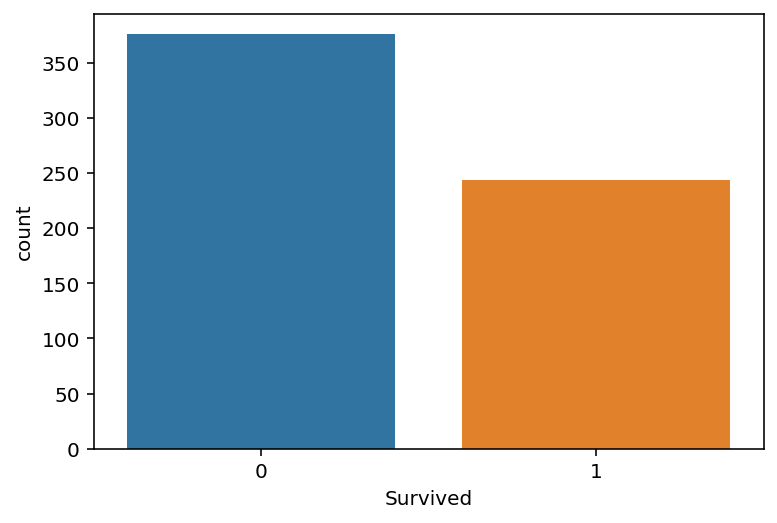

In [152]:
sns.countplot(x='Survived',data=trainData)

<AxesSubplot:xlabel='Survived', ylabel='count'>

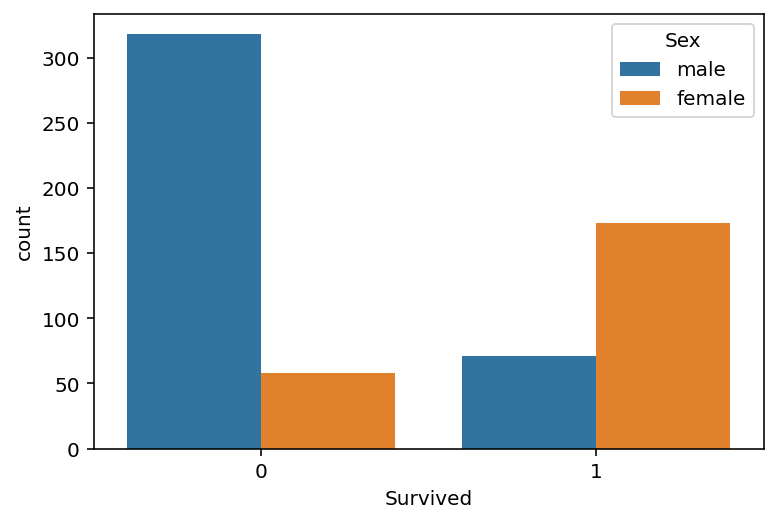

In [153]:
sns.countplot(x='Survived',data=trainData,hue='Sex')

Text(0.5, 0.98, 'Countplots for different hues')

<AxesSubplot:xlabel='Survived', ylabel='count'>

Text(0.5, 1.0, 'Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

Text(0.5, 1.0, 'SibSp')

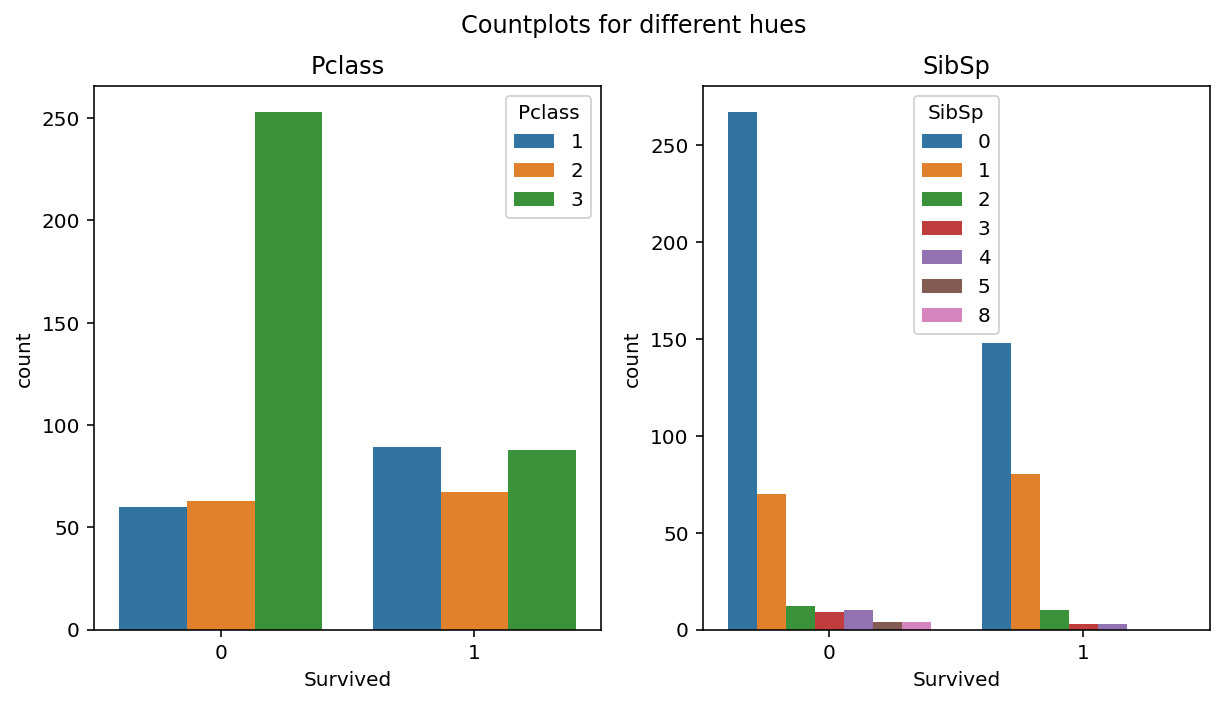

In [154]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Countplots for different hues')
sns.countplot(ax=axes[0],x='Survived',data=trainData,hue='Pclass')
axes[0].set_title('Pclass')
sns.countplot(ax=axes[1],x='Survived',data=trainData,hue='SibSp')
axes[1].set_title('SibSp')

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

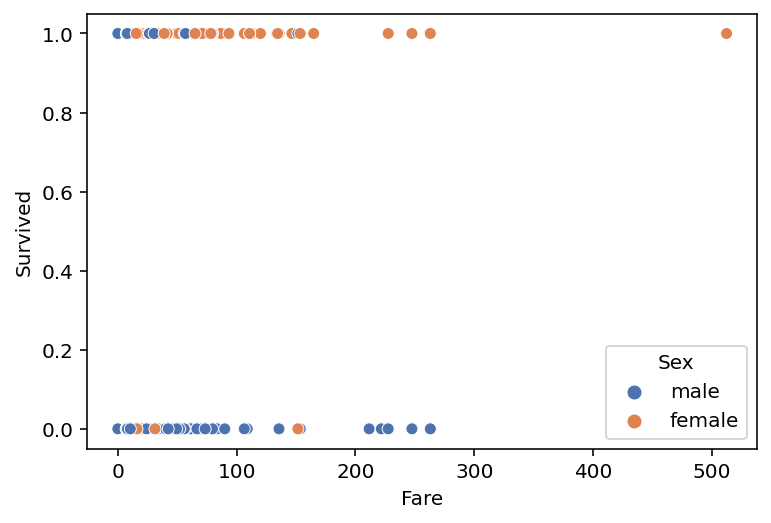

In [155]:
sns.scatterplot(data=trainData, y="Survived", x="Fare", hue="Sex", palette="deep")

<p>Can be infered that mostly female were priority irrespective of the fare they paid.</p>
<p>Also Class was given higher preference as percentage of lower class not survived is high</p>

<h2>Data Cleaning</h2>

In [156]:
trainData.isna().sum()
testData.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            131
SibSp            0
Parch            0
Fare             0
dtype: int64

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            46
SibSp           0
Parch           0
Fare            0
dtype: int64

Text(0.5, 0.98, 'Heatmap for NA values')

<AxesSubplot:>

Text(0.5, 1.0, 'Train Data')

<AxesSubplot:>

Text(0.5, 1.0, 'Test Data')

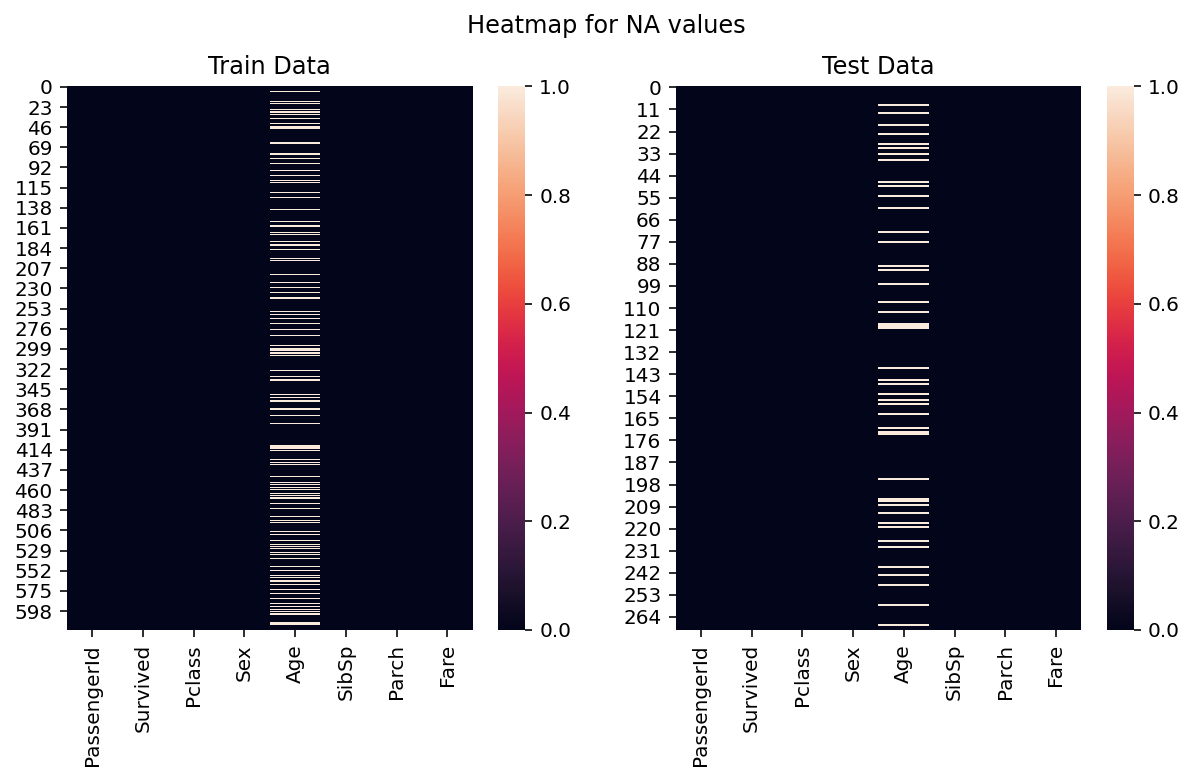

In [157]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Heatmap for NA values')
sns.heatmap(ax=axes[0],data=trainData.isna())
axes[0].set_title('Train Data')
sns.heatmap(ax=axes[1],data=testData.isna())
axes[1].set_title('Test Data')

In [158]:
trainData['Age'].isna().sum()/len(trainData['Age'])*100
testData['Age'].isna().sum()/len(testData['Age'])*100

21.129032258064516

16.974169741697416

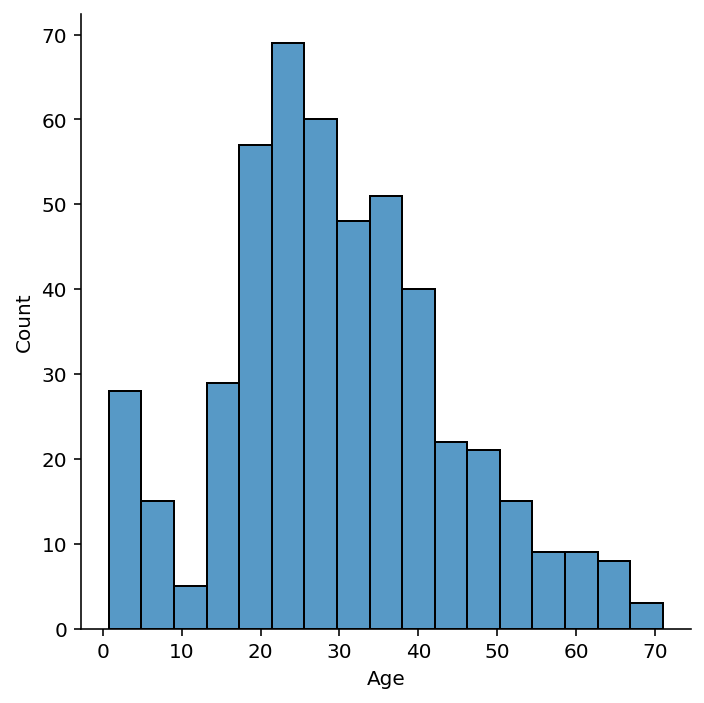

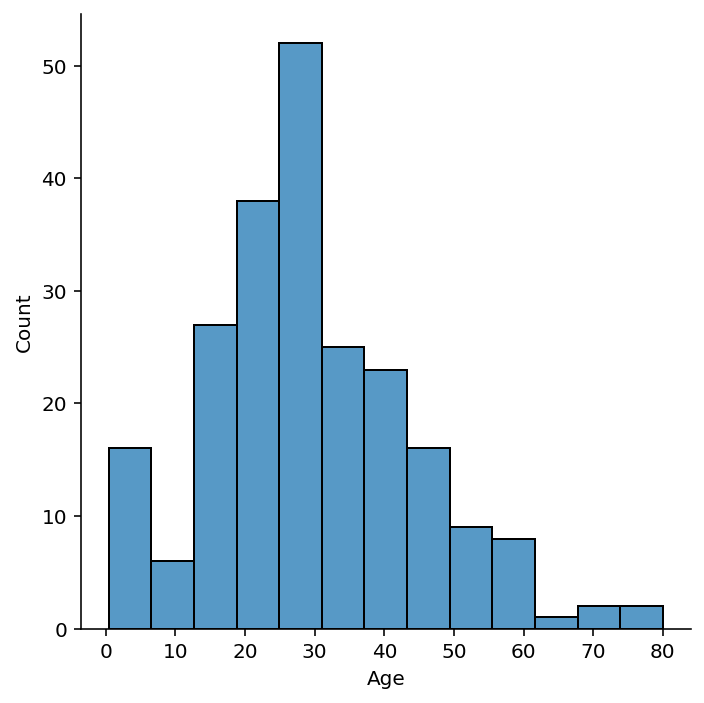

In [159]:
sns.displot(x='Age',data=trainData)
sns.displot(x='Age',data=testData)

In [160]:
#fill missing(na) values with mean

In [161]:
trainData['Age'].fillna(trainData['Age'].mean(),inplace=True)
testData['Age'].fillna(testData['Age'].mean(),inplace=True)

In [162]:
#verify null values

Text(0.5, 0.98, 'Heatmap for NA values')

<AxesSubplot:>

Text(0.5, 1.0, 'Train Data')

<AxesSubplot:>

Text(0.5, 1.0, 'Test Data')

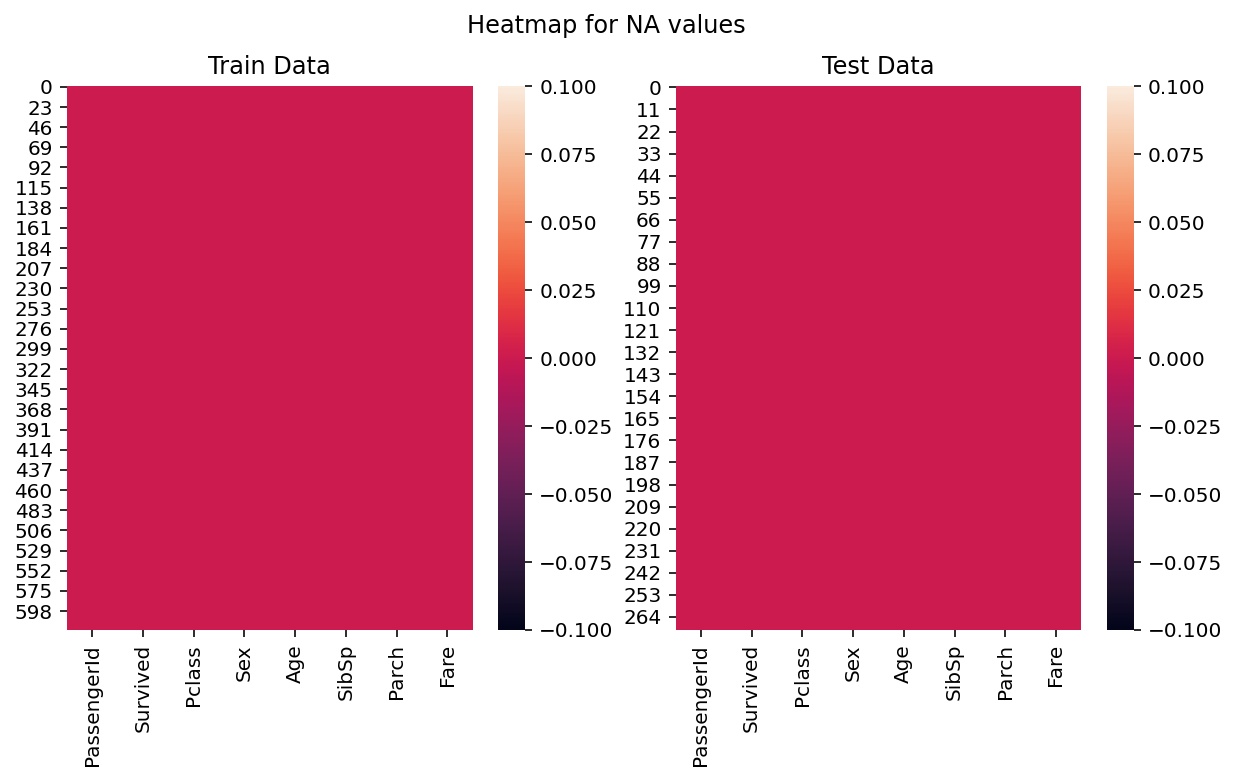

In [163]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Heatmap for NA values')
sns.heatmap(ax=axes[0],data=trainData.isna())
axes[0].set_title('Train Data')
sns.heatmap(ax=axes[1],data=testData.isna())
axes[1].set_title('Test Data')

In [164]:
#checking & converting non-numeric columns to numeric

In [165]:
trainData.dtypes
testData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [166]:
#Converting Sex column to numeric 

In [167]:
genderTrain = pd.get_dummies(trainData['Sex'])
genderTest = pd.get_dummies(testData['Sex'])
print(genderTrain)
print(genderTest)

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
615       1     0
616       0     1
617       1     0
618       1     0
619       0     1

[620 rows x 2 columns]
     female  male
0         0     1
1         0     1
2         0     1
3         0     1
4         0     1
..      ...   ...
266       0     1
267       1     0
268       1     0
269       0     1
270       0     1

[271 rows x 2 columns]


In [168]:
#Assigning gender=(1 for male & 0 for female)

In [169]:
trainData['Gender']=genderTrain['male']
testData['Gender']=genderTest['male']

In [170]:
trainData.head()
testData.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Gender
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,1


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Gender
0,621,0,3,male,27.0,1,0,14.4542,1
1,622,1,1,male,42.0,1,0,52.5542,1
2,623,1,3,male,20.0,1,1,15.7417,1
3,624,0,3,male,21.0,0,0,7.8542,1
4,625,0,3,male,21.0,0,0,16.1000,1


In [171]:
#dropping redundant columns

In [172]:
trainData.drop(['PassengerId','Sex'],axis=1,inplace=True)
testData.drop(['PassengerId','Sex'],axis=1,inplace=True)

<h2>Separating dependent and Independent Variables</h2>

In [173]:
trainY=np.array(trainData['Survived'])
trainData.drop('Survived',axis=1,inplace=True)
trainData.insert(0,'x0',np.ones((len(trainData),1)))
trainX=np.array(trainData)

In [174]:
testY=np.array(testData['Survived'])
testData.drop('Survived',axis=1,inplace=True)
testData.insert(0,'x0',np.ones((len(testData),1)))
testX=np.array(testData)

<h2>Setting up funtions for Logistic Regression</h2>

In [175]:
#Intializing weights with arbitrary value=1

In [176]:
wts=np.ones(testX.shape[1])

In [177]:
print(wts)

[1. 1. 1. 1. 1. 1. 1.]


In [178]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [179]:
# using gradient descent method for optimizing cost funtion

In [180]:
# epsilon for avoiding error when taking log(h2) in case h2 becomes zero
epsilon = 1e-5
def optimize(wts,trainX,trainY):
    m=trainX.shape[0]
    h1=np.dot(trainX,wts)
    h2=sigmoid(h1)
    cost=(-1/m)*(np.dot(trainY.T,np.log(h2+epsilon))+np.dot((1-trainY).T,np.log(1-h2+epsilon)))
    dwts=(1/m)*np.dot(trainX.T,h2-trainY)
    return dwts,cost

In [181]:
# alpha = training rate, iters = no. of iterations used
def train(wts,trainX,trainY,alpha,iters):
    costs=[]
    for i in range(iters):
        dwts,cost=optimize(wts,trainX,trainY)
        wts=wts-alpha*dwts
        if(i%100==0):
            costs.append(cost)
    return wts,costs

Text(0, 0.5, 'cost')

Text(0.5, 0, 'number of iterations/100')

Text(0.5, 1.0, 'cost value over time')

Cost value after final iterations 0.4688982264798164


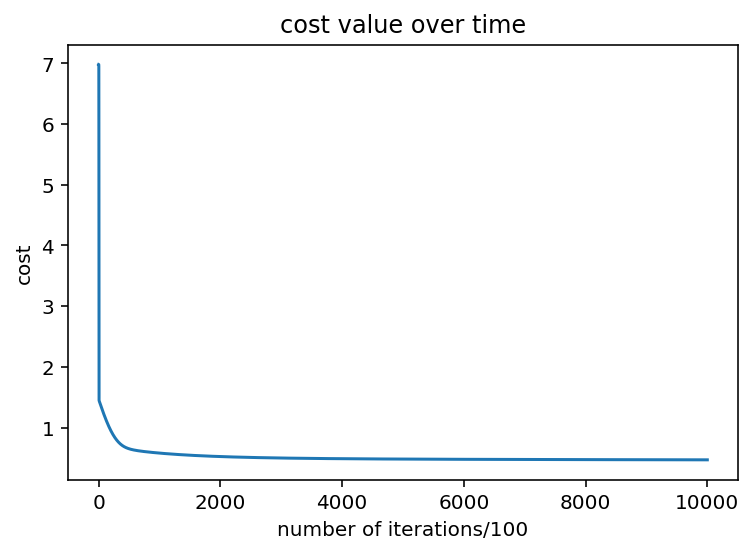

In [182]:
finalWts,costs=train(wts,trainX,trainY,0.0001,1000000)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('number of iterations/100')
plt.title('cost value over time')
print("Cost value after final iterations",costs[-1])
plt.show()

<p> Cost is minimum for <b>0.001</b> & <b>10<sup>6</sup></b> iterations. <b>0.0001</b> is suggested as starting value with step of roughly 3 times by Andrew Ng of Stanford University</p>

In [183]:
# finding hypothesis using sigmoid(summation(wi*xi)) from 0 to n

In [184]:
def predict(finalWts,tX):
    m=trainX.shape[0]
    predictY=np.zeros((m,1))
    h1=np.dot(tX,finalWts)
    h2=sigmoid(h1)
    #reshaping to m*1
    h2=np.reshape(h2,(h2.shape[0],1))
    predictY=h2>0.5
    #flattening the predictedY
    predictY=predictY.reshape(-1)
    return predictY,h2

<h2>Finding Result and stats such as confusion matrix, accuracy, recall F1 score, Precision</h2>

In [185]:
predictTestY,testScoreY=predict(finalWts,testX)
predictTrainY,trainScoreY=predict(finalWts,trainX)
predictTestY=predictTestY.astype(int)
predictTrainY=predictTrainY.astype(int)

In [186]:
def computeConfusionMatrix(predictY,trueY):
    result=np.zeros((2,2))
    for i in range(len(trueY)):
        result[trueY[i]][predictY[i]]+=1
    df=pd.DataFrame(result,columns=['Yes','No'],index=['Yes','No'])
    return df

<AxesSubplot:>

Text(0.5, 15.0, 'Predicted Class')

Text(33.0, 0.5, 'Actual Class')

Testing Class


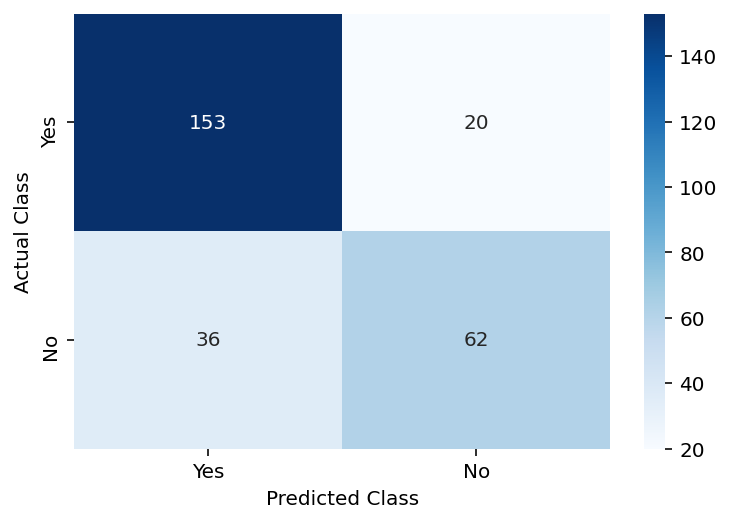

Total entries for Testing class 271.0


<AxesSubplot:>

Text(0.5, 15.0, 'Predicted Class')

Text(33.0, 0.5, 'Actual Class')

Training Class


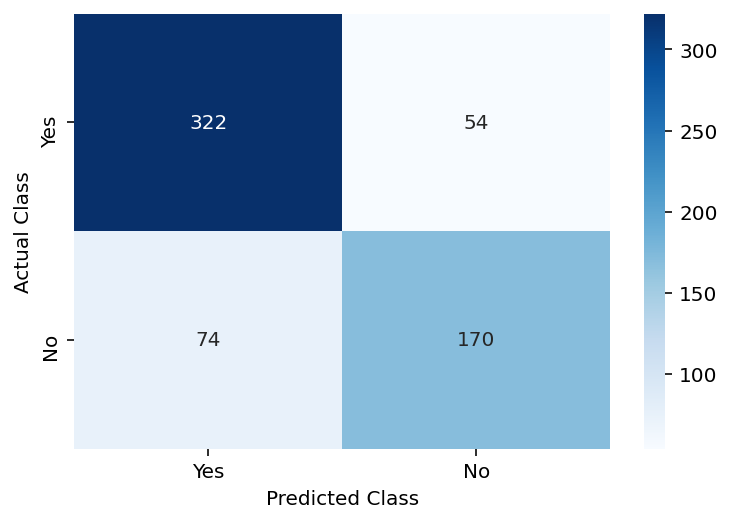

Total entries for Training class 620.0


In [187]:
confMatrixTest=computeConfusionMatrix(predictTestY,testY)
sns.heatmap(confMatrixTest, annot=True,fmt='g', cmap='Blues')
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
print('Testing Class')
plt.show()
print("Total entries for Testing class",confMatrixTest.values.sum())
confMatrixTrain=computeConfusionMatrix(predictTrainY,trainY)
sns.heatmap(confMatrixTrain, annot=True,fmt='g', cmap='Blues')
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
print('Training Class')
plt.show()
print('Total entries for Training class',confMatrixTrain.values.sum())

In [188]:
# Getting all true and false combination to pos and neg

In [189]:
def printClassStats(className,cf):
    print(className)
    print("True Positives = {:.0f}".format(cf.iat[0,0]))
    print("True Negatives = {:.0f}".format(cf.iat[1,1]))
    print("False Positives = {:.0f}".format(cf.iat[1,0]))
    print("False Negatives = {:.0f}".format(cf.iat[0,1]))
    print("Total Entries = {:.0f}".format(cf.values.sum()))

In [190]:
printClassStats("Testing Class",confMatrixTest)
print()
printClassStats("Training Class",confMatrixTrain)

Testing Class
True Positives = 153
True Negatives = 62
False Positives = 36
False Negatives = 20
Total Entries = 271

Training Class
True Positives = 322
True Negatives = 170
False Positives = 74
False Negatives = 54
Total Entries = 620


In [191]:
# Printing stats

In [192]:
def printStats(className,cf):
    print(className)
    print("Total Entries = {:.0f}".format(cf.values.sum()))
    accuracy=(cf.iat[0,0]+cf.iat[1,1])/cf.values.sum()
    precision=cf.iat[0,0]/(cf.iat[0,0]+cf.iat[1,0])
    recall=cf.iat[0,0]/(cf.iat[0,0]+cf.iat[0,1])
    f1score=(2*recall*precision)/(recall+precision)
    print("Accuracy = {:.4f}%".format(accuracy*100))
    print("Precision = {:.4f}%".format(precision*100))
    print("Recall = {:.4f}%".format(recall*100))
    print("F1 Score = {:.4f}%".format(f1score*100))

In [193]:
printStats("Test Data",confMatrixTest)
l1=((-1/testY.shape[0])*(np.dot(testY.T,np.log(testScoreY+epsilon))+np.dot((1-testY).T,np.log(1-testScoreY+epsilon))))
print('Loss = {:.4f}%'.format(l1[0]*100))
print()
printStats("Train Data",confMatrixTrain)
l2=((-1/trainY.shape[0])*(np.dot(trainY.T,np.log(trainScoreY+epsilon))+np.dot((1-trainY).T,np.log(1-trainScoreY+epsilon))))
print('Loss = {:.4f}%'.format(l2[0]*100))

Test Data
Total Entries = 271
Accuracy = 79.3358%
Precision = 80.9524%
Recall = 88.4393%
F1 Score = 84.5304%
Loss = 44.9698%

Train Data
Total Entries = 620
Accuracy = 79.3548%
Precision = 81.3131%
Recall = 85.6383%
F1 Score = 83.4197%
Loss = 46.8897%


<h2>References used for this assignment</h2>
<p>
    <ol>
        <li>Used <a href="https://www.baeldung.com/cs/gradient-descent-logistic-regression">Baeldung</a> for theory on Logistic Regression.</li>
        <li>Used <a href="https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/">Exsilio </a>blog for stats related to machine learning.</li>
        <li>Coursera Course of Machine Learning by Andrew Ng</li>
        <li>Documentations of Pandas, Seaborn, Matplotlib, Python and numpy</li>
    </ol>
</p>